In [1]:
import pandas as pd

df = pd.read_csv("Dataset .csv")   # example: zomato.csv
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [2]:
# Check first few rows
df[['Restaurant Name', 'Votes', 'Aggregate rating']].head()

# Check for missing values
df[['Votes', 'Aggregate rating']].isnull().sum()


Votes               0
Aggregate rating    0
dtype: int64

In [3]:
df['Votes'].fillna(0, inplace=True)
df['Aggregate rating'].fillna(df['Aggregate rating'].mean(), inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_17984\2246659015.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Votes'].fillna(0, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_17984\2246659015.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'd

In [4]:
# Highest votes
top_votes = df[['Restaurant Name', 'Votes', 'Aggregate rating']].sort_values(by='Votes', ascending=False).head(5)
print("Top 5 restaurants by votes:\n", top_votes)

# Lowest votes
low_votes = df[['Restaurant Name', 'Votes', 'Aggregate rating']].sort_values(by='Votes', ascending=True).head(5)
print("\nBottom 5 restaurants by votes:\n", low_votes)


Top 5 restaurants by votes:
                 Restaurant Name  Votes  Aggregate rating
728                        Toit  10934               4.8
735                    Truffles   9667               4.7
3994           Hauz Khas Social   7931               4.3
2412                  Peter Cat   7574               4.3
739   AB's - Absolute Barbecues   6907               4.6

Bottom 5 restaurants by votes:
          Restaurant Name  Votes  Aggregate rating
1173           Aha Bites      0               0.0
1172  Achoos Food Corner      0               0.0
8558           Food Town      0               0.0
6165    Zaika Restaurant      0               0.0
6164         Smily Cakes      0               0.0


In [5]:
# Correlation
correlation = df['Votes'].corr(df['Aggregate rating'])
print("Correlation between votes and rating:", round(correlation, 2))


Correlation between votes and rating: 0.31


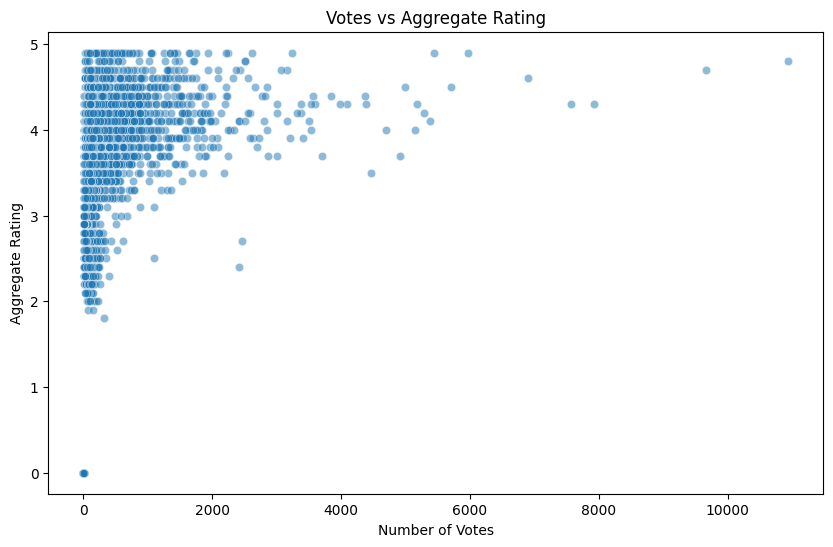

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(x='Votes', y='Aggregate rating', data=df, alpha=0.5)
plt.title('Votes vs Aggregate Rating')
plt.xlabel('Number of Votes')
plt.ylabel('Aggregate Rating')
plt.show()


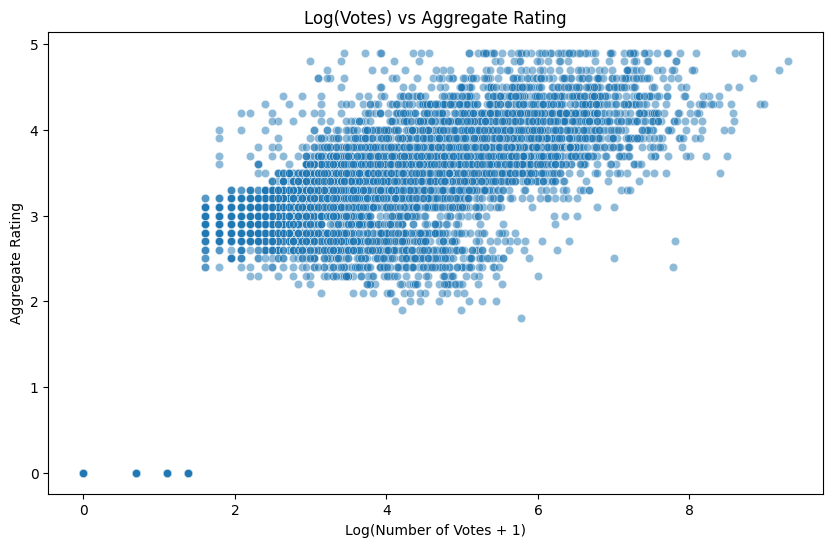

In [7]:
import numpy as np

plt.figure(figsize=(10,6))
sns.scatterplot(x=np.log1p(df['Votes']), y='Aggregate rating', data=df, alpha=0.5)
plt.title('Log(Votes) vs Aggregate Rating')
plt.xlabel('Log(Number of Votes + 1)')
plt.ylabel('Aggregate Rating')
plt.show()


1.Restaurants with the highest votes are often more popular or widely recognized.

2.Restaurants with low votes may be new or less popular.

3.Scatter plot and correlation help understand if popularity (votes) aligns with quality (ratings).